### Examine the Data

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE for Tank_1: 319776.3222963084
RMSE for Tank_1: 565.4876853622087
MAE for Tank_1: 481.5261129146757
R2 Score for Tank_1: 0.15714783346671646

MSE for Tank_2: 343475.95940840174
RMSE for Tank_2: 586.0682207801424
MAE for Tank_2: 488.67544641579985
R2 Score for Tank_2: 0.2323135999800452

MSE for Tank_3: 345648.7540746929
RMSE for Tank_3: 587.9190029882458
MAE for Tank_3: 466.95466443949135
R2 Score for Tank_3: -0.5435335443872495

MSE for Pump_1: 0.2074276509982046
RMSE for Pump_1: 0.4554422586873166
MAE for Pump_1: 0.4124367593351512
R2 Score for Pump_1: 0.059677371799991885

MSE for Pump_2: 0.11655453501951928
RMSE for Pump_2: 0.34140084214822797
MAE for Pump_2: 0.2779083803803544
R2 Score for Pump_2: 0.08997103104581161

MSE for Flow_sensor: 2939477.730830314
RMSE for Flow_sensor: 1714.4905164013926
MAE for Flow_sensor: 1452.4370156965274
R2 Score for Flow_sensor: 0.15773334456840338



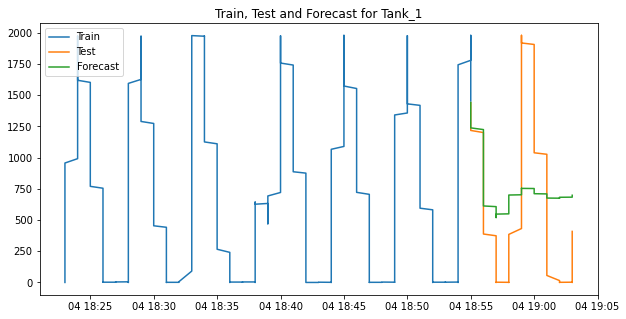

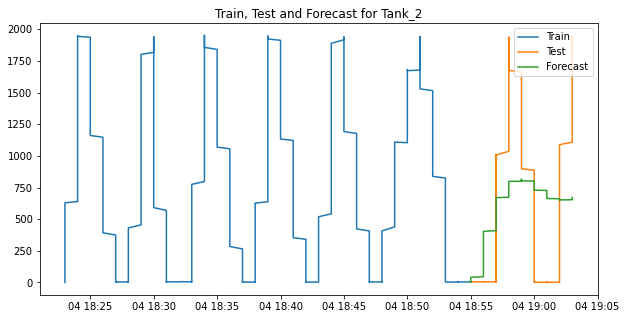

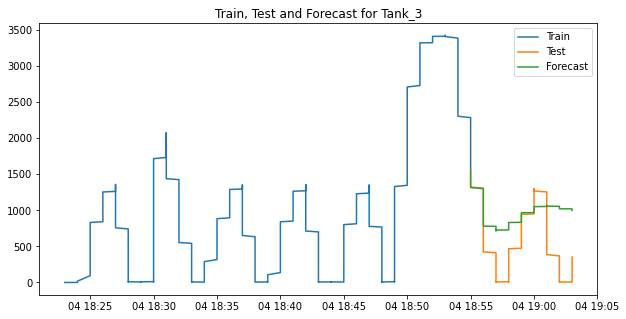

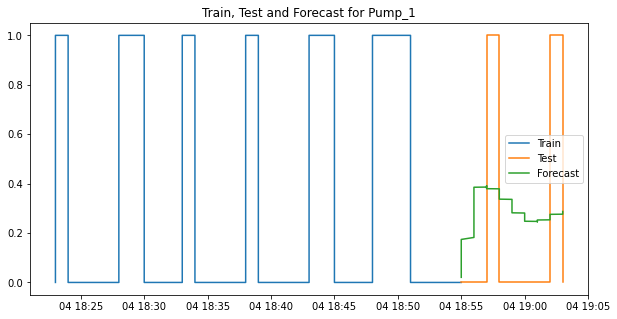

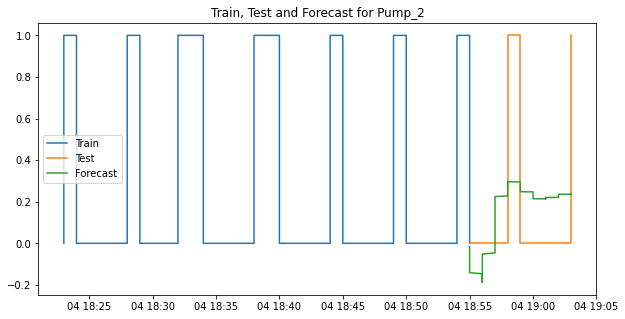

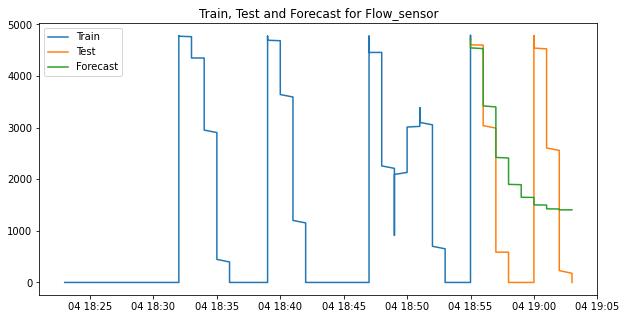

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
file_name = 'phy_cps.csv'
# file_name = 'waterTank_Golden_reduced.csv'
data = pd.read_csv(file_name, index_col=0, parse_dates=True)
data = data.dropna()

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]
# train, test = data[:train_size], data[train_size:]

# Fit the VAR model
model = VAR(train)
# model_fitted = model.fit(maxlags=15, ic='aic')
model_fitted = model.fit(maxlags=15, ic='aic')

# Make forecasts
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


# Evaluate forecasts
results = {}
for col in test.columns:
    mse = mean_squared_error(test[col], forecast_df[col])
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
    mae = mean_absolute_error(test[col], forecast_df[col])
    r2score = r2_score(test[col], forecast_df[col])
    results[col] = rmse
    print(f'MSE for {col}: {mse}')
    print(f'RMSE for {col}: {rmse}')
    print(f'MAE for {col}: {mae}')
    print(f'R2 Score for {col}: {r2score}\n')

# Plot results
for col in test.columns:
    plt.figure(figsize=(10, 5))
    # plt.plot(train.index, train[col], label='Train')
    # plt.plot(test.index, test.iloc[col], label='Test')
    # plt.plot(forecast_df.index, forecast_df.iloc[col], label='Forecast')
    plt.plot(train[col], label='Train')
    plt.plot(test[col], label='Test')
    plt.plot(forecast_df[col], label='Forecast')
    plt.title(f'Train, Test and Forecast for {col}')
    plt.legend()
    plt.show()


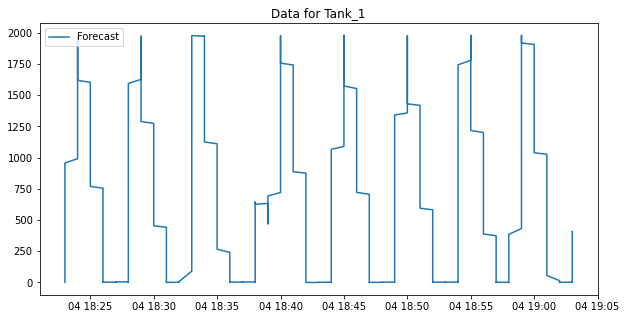

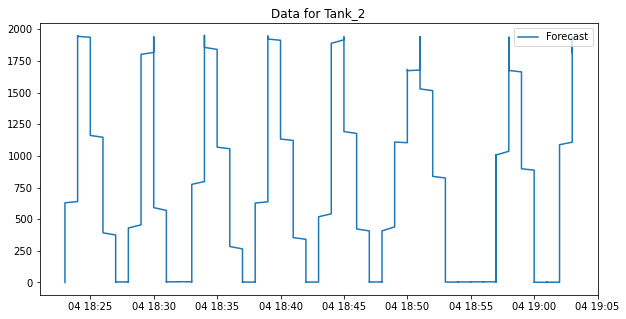

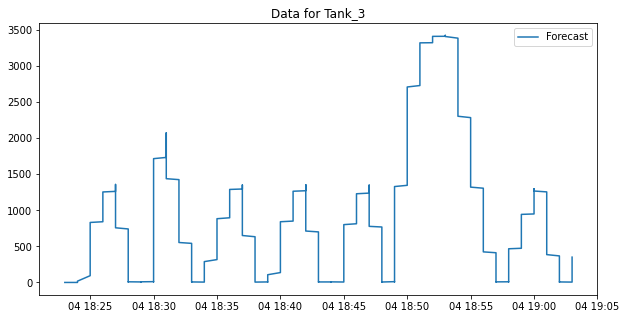

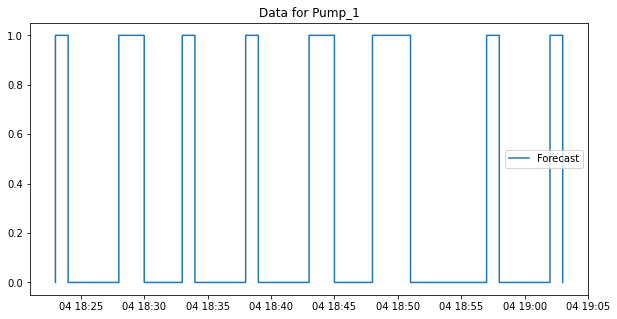

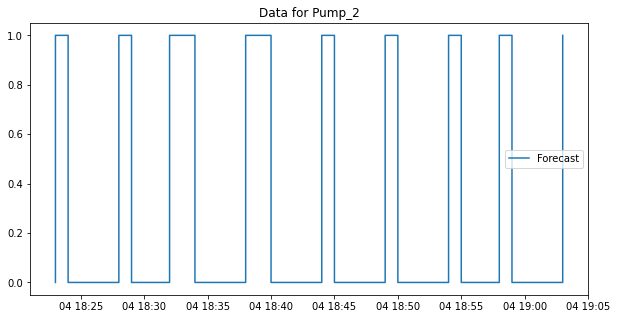

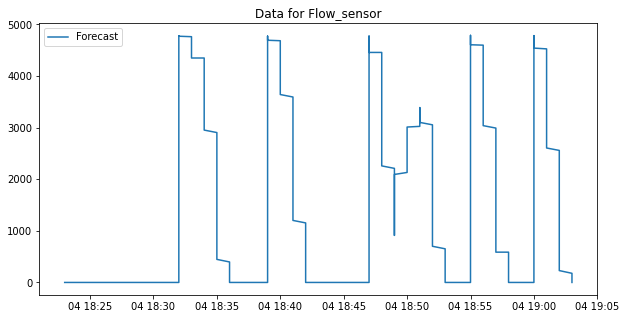

In [14]:
for col in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[col], label='Forecast')
    plt.title(f'Data for {col}')
    plt.legend()
    plt.show()

In [15]:
train_size

1936

In [19]:
data.describe()

,Tank_1,Tank_2,Tank_3,Pump_1,Pump_2,Flow_sensor
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,686.320661,714.946281,922.677686,0.300000,0.243802,1283.821488
std,654.955181,656.051613,942.572849,0.458352,0.429463,1738.336519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,73.250000,0.000000,0.000000,0.000000
50%,598.000000,639.500000,747.500000,0.000000,0.000000,0.000000
75%,1244.000000,1293.250000,1226.250000,1.000000,0.000000,2769.000000
max,1980.000000,1952.000000,3427.000000,1.000000,1.000000,4789.000000
